# Analysis

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf


## Import data

In [2]:
data = pd.read_csv("Tripadvisordata_final.csv")

data= data.round(2)

list = []
for i in range(len(data["Type of food"])):  
    if "<div" in str(data["Type of food"][i]):
        list.append(i)
    
#print(list)
for i in list:
    data["Type of food"][i] = "Missing"


# set color "Tripadvisor-green"
green_color = "#00AF87"


C:\Users\sofie\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [3]:
data.head()

,Restaurant,Main rating,Ranking on list,Price range,Price class,Location,Good price,Food,Service,Atmosphere,Type of food,Number of reviews,Address,Type of food link,New price class,Price class numeric,Reverse ranking on list,Full ranking,Distance from Kgs. Nytorv (m),Postal code
0,Burger King,1.0,2148.0,NaN,--$$$$$$,"55.65107,12.50931",NaN,NaN,NaN,NaN,NaN,2.0,"Ellebjergvej 142, København 2450 Danmark",NaN,$$$$$$,99,-2148.0,1,199.0,2450
1,Almanac,1.0,2146.0,NaN,---,"55.67788,12.591933",NaN,NaN,NaN,NaN,Dansk,2.0,"Havnegade 44, København Danmark","<div class=""header_links""><a href=""/Restaurant...",$$$$$$,99,-2146.0,2,459.0,
2,Star Midnight Kebab-Grill,1.0,2143.0,101,--$$-$$$---,"55.6679,12.54941",NaN,NaN,NaN,NaN,Grill,3.0,"Istedgade 101, København Danmark","<div class=""header_links""><a href=""/Restaurant...",$$-$$$,2,-2143.0,3,3431.0,
3,Sunset Boulevard,1.0,2137.0,NaN,--$$$$$$,"55.67502,12.580593",NaN,NaN,NaN,NaN,NaN,2.0,"Københavns Hovedbanegård, København 1570 Danmark",NaN,$$$$$$,99,-2137.0,4,908.0,1570
4,Dwaraka Indisk Restaurant,1.0,2104.0,141,--$$-$$$---,"55.72732,12.524776",NaN,NaN,NaN,NaN,Indisk,1.0,"Frederiksborgvej 221, St, København 2860 Danmark","<div class=""header_links""><a href=""/Restaurant...",$$-$$$,2,-2104.0,5,1171.0,2860


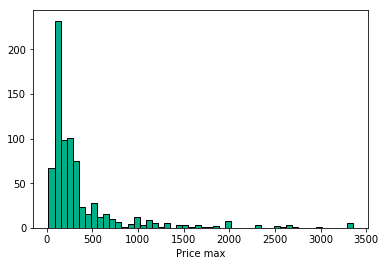

In [4]:
#creates a dataframe containing only the reastaurants with observations on Price range and converting the values to integers

price_df = data.copy()
price_df= price_df.dropna(subset = ["Price range"]) # drop observations without info on max price

# Change values on max price from object to string to integer
price_list = []
for i in price_df["Price range"]:
    price_list.append(str(i))

price_df["Price_range_2"] = price_list

price_df["Price_range_2"] = price_df["Price_range_2"].str.strip()
price_df = price_df[price_df["Price_range_2"] != ","]

price_list2 = []
for i in price_df["Price_range_2"]:
    x = i.translate({ord('.'): None})
    y = int(x)
    price_list2.append(y)

price_df["Price_range_2"] = price_list2 # add to dataframe

price_df.to_csv("price_df.csv")

# Limit the dataset
price_df = price_df[price_df["Distance from Kgs. Nytorv (m)"]<10000] # 10 km from Kgs. Nytorv (m)
price_df = price_df[price_df["Price_range_2"]<3500] # remove the most expensive

# histogram of prices
fig, ax = plt.subplots()
X = price_df["Price_range_2"]
# Draw the plot
ax.hist(X,color = green_color , bins= 50, edgecolor = 'black')
ax.set_xlabel('Price max')
ax.set_facecolor('white')
plt.savefig('priceplot.png')
plt.show()



## Generates and saves summary table of data

In [5]:
sum_tab = data.describe()
sum_tab.to_csv("Summary_tab.csv")

# Make copy of dataset containing only restaurants in greater-Copenhagen 

In [6]:
mod_df = data.copy()
# Obs filter restaurants more than 10 km from Kgs. Nytorv
mod_df = data[data["Distance from Kgs. Nytorv (m)"]<10000] # 10 km from Kgs. Nytorv (m)
price_df = price_df[price_df["Distance from Kgs. Nytorv (m)"]<10000] # 10 km from Kgs. Nytorv (m)



## OLS estmation of full ranking as funktion if distance, price class and number of reviews

In [7]:
# Subset data
reg_df = mod_df.loc[mod_df['Price class numeric'] != 99] 
reg_df = reg_df.loc[mod_df['Full ranking'] != 2000] 
reg_df = reg_df[pd.to_numeric(reg_df['Distance from Kgs. Nytorv (m)'], errors='coerce').notnull()]

# Estimate model
reg1 = sm.OLS(endog=reg_df['Full ranking'], exog=reg_df[['Distance from Kgs. Nytorv (m)', 'Price class numeric', "Number of reviews"]], missing='drop')
results = reg1.fit()

#Print to tex format
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w') # save
f.write(beginningtex)
f.write(results.summary().as_latex())
f.write(endtex)
f.close()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:           Full ranking   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     1771.
Date:                Thu, 29 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:46:31   Log-Likelihood:                -12838.
No. Observations:                1633   AIC:                         2.568e+04
Df Residuals:                    1630   BIC:                         2.570e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Distance from 

## Generate scatterplot with fitted line of ranking as function of distance to Kongens Nytorv

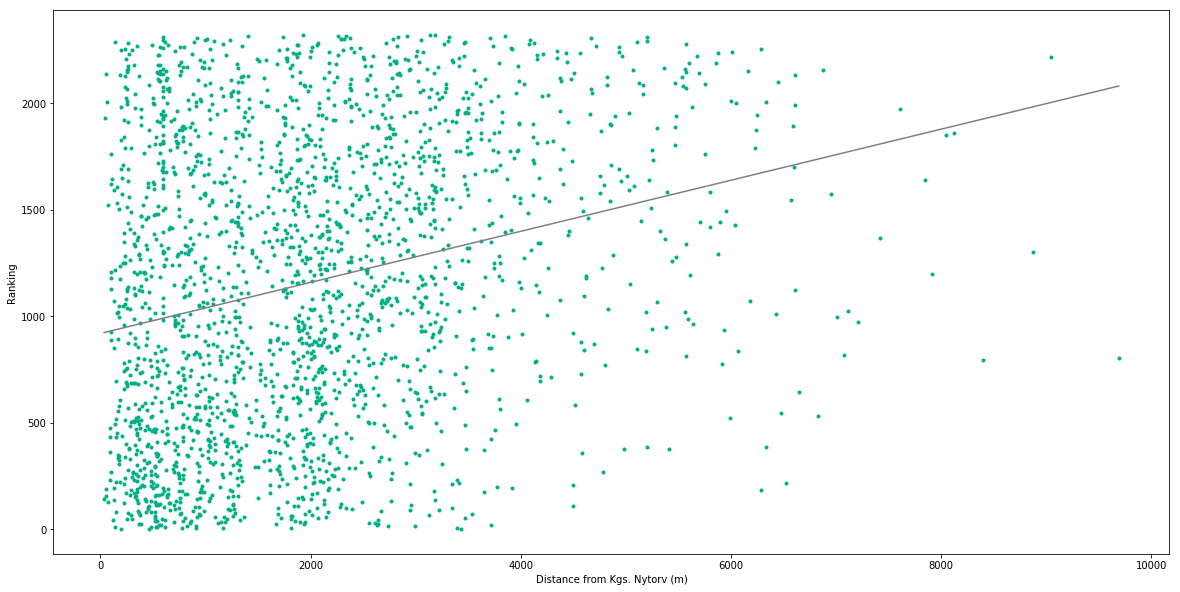

In [8]:
X = mod_df["Distance from Kgs. Nytorv (m)"]
y = mod_df["Full ranking"]

fig, ax = plt.subplots()
ax.scatter(X, y, marker='.', color = green_color) #choose scatter plot
plt.gcf().set_size_inches((20, 10)) #set size of graph area

# add fitted line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='grey')

ax.set_xlabel('Distance from Kgs. Nytorv (m)')
ax.set_ylabel('Ranking')
ax.set_facecolor('white') # change background color

plt.savefig('scatter_fit1.jpeg')
plt.show()





## Generate histogram over distance to Kongens Nytorv

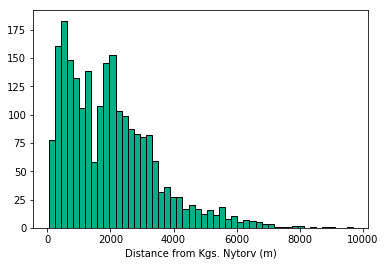

In [9]:
fig, ax = plt.subplots()
    
# Draw the plot
ax.hist(X,color = green_color , bins= 50, edgecolor = 'black')
ax.set_xlabel('Distance from Kgs. Nytorv (m)')
ax.set_facecolor('white')
plt.savefig('distplot.png') # save
plt.show()


## OLS estimation for servicelevel ranking

In [10]:
# Make dataset only of service is not missing

service_df = mod_df.dropna(subset = ["Service"])
# Make ranking system
service_df["Reverse ranking on list"] = (-1)*service_df["Ranking on list"]

# sort on rating, ranking on list and number of reviews
service_df = service_df.sort_values(by=["Service", "Reverse ranking on list", "Number of reviews"])

# Add ranking
service_df["Full ranking Service"] = range(1,len(service_df["Number of reviews"])+1)

# OLS 
reg2 = sm.OLS(endog=service_df['Full ranking Service'], exog=service_df[['Distance from Kgs. Nytorv (m)', 'Price class numeric', "Number of reviews"]], missing='drop')

results = reg2.fit()

# Write to tex format
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg_service.tex', 'w')
f.write(beginningtex)
f.write(results.summary().as_latex())
f.write(endtex)
f.close()
print(results.summary())




                             OLS Regression Results                             
Dep. Variable:     Full ranking Service   R-squared:                       0.623
Model:                              OLS   Adj. R-squared:                  0.622
Method:                   Least Squares   F-statistic:                     706.3
Date:                  Thu, 29 Aug 2019   Prob (F-statistic):          4.86e-271
Time:                          20:46:32   Log-Likelihood:                -9698.9
No. Observations:                  1286   AIC:                         1.940e+04
Df Residuals:                      1283   BIC:                         1.942e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

C:\Users\sofie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Generate pie-charts of common food in areas

In [11]:
food_df = pd.read_csv("type_mad_df.csv")
food_df.head()

,Unnamed: 0,Location,Ranking on list,Price class numeric,Restaurant,Postal code,Pizza,Sushi,Fisk og skaldyr,Thai,Café,Italiensk,Indisk,Mexikansk,Steakhouse
0,0,"55.65107,12.50931",2148.0,99,Burger King,2450,False,False,False,False,False,False,False,False,False
1,1,"55.67788,12.591933",2146.0,99,Almanac,,False,False,False,False,False,False,False,False,False
2,2,"55.6679,12.54941",2143.0,2,Star Midnight Kebab-Grill,,False,False,False,False,False,False,False,False,False
3,3,"55.67502,12.580593",2137.0,99,Sunset Boulevard,1570,False,False,False,False,False,False,False,False,False
4,4,"55.72732,12.524776",2104.0,2,Dwaraka Indisk Restaurant,2860,False,False,False,False,False,False,True,False,False


In [12]:
print(type(food_df["Postal code"][1]))

#Copenhagen central post codes 
kbhK =[]
for i in range(1000,1500):
    kbhK.append(str(i))

kbhV = []
for i in range(1500, 1800):
    kbhV.append(str(i))
    
frb = []
for i in range(1800, 2100):
    frb.append(str(i))

food_df["Postal code"] = food_df["Postal code"].str.strip() # remove spaces in strings


<class 'str'>


In [13]:
# remove all with no postal code
food_df =  food_df.dropna(subset = ["Postal code"])

#List of kitchens
list_ = ["Pizza", "Sushi", "Fisk og skaldyr", "Thai", "Café", "Italiensk", "Indisk", "Mexikansk", "Steakhouse"]
en_list_ = ["Pizza", "Sushi", "Seafood", "Thai", "Café", "Italian", "Indian", "Mexican", "Steakhouse"]

# change booleans to 1/0
for x in list_:
    app = []
    for i in food_df[x]:
        if i == True:
            app.append(1)
        else:
            app.append(0)
    #print(app)
    food_df[str(x)]=app

Area = []
# make areas   
for i in food_df["Postal code"]: 
    if i in kbhK:
        Area.append("kbh k")
    elif i in kbhV:
         Area.append("kbh v")
    elif i in frb:
        Area.append("frb.")
    elif i ==  "2100":
        Area.append("kbh ø")
    elif i == "2200":
        Area.append("kbh n")
    elif i == "2300":
        Area.append("kbh s")
    elif i == "2450":
        Area.append("kbh sv")
    elif i == "2400":
        Area.append("valby")
    elif i == "2500":
        Area.append("valby")
    else:
        Area.append("andet")


In [14]:
food_df = pd.merge(food_df, mod_df[["Restaurant","Main rating"]], on='Restaurant', how='left')
food_df

,Unnamed: 0,Location,Ranking on list,Price class numeric,Restaurant,Postal code,Pizza,Sushi,Fisk og skaldyr,Thai,Café,Italiensk,Indisk,Mexikansk,Steakhouse,Main rating
0,0,"55.65107,12.50931",2148.0,99,Burger King,2450,0,0,0,0,0,0,0,0,0,1.0
1,1,"55.67788,12.591933",2146.0,99,Almanac,,0,0,0,0,0,0,0,0,0,1.0
2,2,"55.6679,12.54941",2143.0,2,Star Midnight Kebab-Grill,,0,0,0,0,0,0,0,0,0,1.0
3,3,"55.67502,12.580593",2137.0,99,Sunset Boulevard,1570,0,0,0,0,0,0,0,0,0,1.0
4,3,"55.67502,12.580593",2137.0,99,Sunset Boulevard,1570,0,0,0,0,0,0,0,0,0,3.0
5,3,"55.67502,12.580593",2137.0,99,Sunset Boulevard,1570,0,0,0,0,0,0,0,0,0,3.5
6,3,"55.67502,12.580593",2137.0,99,Sunset Boulevard,1570,0,0,0,0,0,0,0,0,0,3.5
7,4,"55.72732,12.524776",2104.0,2,Dwaraka Indisk Restaurant,2860,0,0,0,0,0,0,1,0,0,1.0
8,5,"55.66268,12.56187",2103.0,99,McDonald's,1560,0,0,0,0,0,0,0,0,0,1.0
9,5,"55.66268,12.56187",2103.0,99,McDonald's,1560,0,0,0,0,0,0,0,0,0,1.5


In [15]:
Pizza = []
Sushi = []
Seafood = []
Thai = []
Café = []
Italian = [] 
Indian = [] 
Mexican = []
Steakhouse = []

Lists = [Pizza, Sushi, Seafood, Thai, Café, Italian, Indian, Mexican, Steakhouse]


for i in range(6,15): 
    liste = Lists[i-6]
    for x in range(len(food_df.iloc[:,i])):
        if food_df.iloc[:,i][x] == 1: 
            #print(type(food_df.iloc[:,-1][x]))
            liste.append(food_df.iloc[:,-1][x].astype(float))


In [16]:
means = []
lenght = []
for i in Lists:
    i = [x for x in i if x.astype(str) != 'nan']
    lenght.append(len(i))
    if len(i) == 0:
        c=0
    else:
        c= (sum(i)/len(i))
    means.append(c)
   

 

In [17]:
Food_means = percentile_list = pd.DataFrame(np.column_stack([en_list_, means, lenght]), 
                               columns=['Kitchen', 'Mean Rating', 'Number of Restaurants'])

Food_means["Mean Rating"] = Food_means["Mean Rating"].str.strip()

# make ratings an rounded integer
rat = []
for i in Food_means["Mean Rating"]:
    i = i.translate({ord('.'): None}) # remove the "."
    i = i[:3] # take first three characters
    i = int(i)/100 # make integer and divide by 100
    rat.append(i) # append to list    
    
Food_means["Mean Rating"] = rat # append to dataframe

# remove the row of non-existing mexican kitchens
Food_means = Food_means.loc[Food_means['Mean Rating'] != 0.0] 
Food_means = Food_means.sort_values(by = ['Mean Rating'])

Food_means

,Kitchen,Mean Rating,Number of Restaurants
6,Indian,3.66,60
8,Steakhouse,3.81,35
0,Pizza,3.88,125
3,Thai,3.94,68
1,Sushi,3.95,135
5,Italian,4.01,249
4,Café,4.04,222
2,Seafood,4.22,84


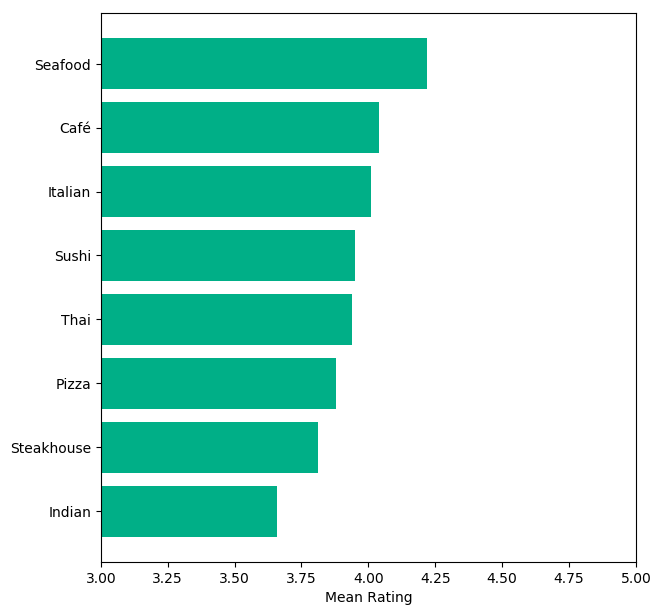

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()
plt.style.use('ggplot')
plt.gcf().set_size_inches((8, 8)) #set size of graph area
fig.tight_layout(pad=8)


# Example data
rests = [Food_means["Mean Rating"]]
y_pos = Food_means["Kitchen"]
performance = Food_means["Mean Rating"]

ax.barh(y_pos, performance, align='center', color = green_color)
#ax.set_yticks(y_pos)
#ax.set_yticklabels("Type of food")
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Mean Rating')
ax.set_xlim(3,5)
ax.yaxis.label.set_size(20)

#ax.set_title('How fast do you want to go today?')
label = [Food_means["Mean Rating"]]

plt.savefig('kitchenplot.png')
